In [86]:
### Importing relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
### # load data into a pandas dataframe

df = pd.read_csv("Crimes_-_2001_to_Present.csv")

In [3]:
### seeing how the data is 

df.head()

ID Case Number                    Date                  Block  IUCR  \
0  11646166    JC213529  09/01/2018 12:01:00 AM  082XX S INGLESIDE AVE  0810   
1  11645836    JC212333  05/01/2016 12:25:00 AM    055XX S ROCKWELL ST  1153   
2  11243268    JB167760  01/01/2017 12:01:00 AM       047XX N CLARK ST  1562   
3   1896258     G749215  12/15/2001 02:00:00 AM       011XX N STATE ST  0460   
4  11645527    JC212744  02/02/2015 10:00:00 AM     069XX W ARCHER AVE  1153   

         Primary Type                          Description  \
0               THEFT                            OVER $500   
1  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
2         SEX OFFENSE            AGG CRIMINAL SEXUAL ABUSE   
3             BATTERY                               SIMPLE   
4  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0            RESIDENCE   False      True  ...   8.0            44.0        06   
1                  NaN   False     False  ...  15.0            63.0        11   
2            APARTMENT   False     False  ...  47.0             3.0        17   
3               STREET   False     False  ...   NaN             NaN       08B   
4                OTHER   False     False  ...  23.0            56.0        11   

   X Coordinate Y Coordinate  Year              Updated On  Latitude  \
0           NaN          NaN  2018  04/06/2019 04:04:43 PM       NaN   
1           NaN          NaN  2016  04/06/2019 04:04:43 PM       NaN   
2           NaN          NaN  2017  09/13/2018 03:56:52 PM       NaN   
3           NaN          NaN  2001  08/17/2015 03:03:40 PM       NaN   
4           NaN          NaN  2015  04/06/2019 04:04:43 PM       NaN   

  Longitude  Location  
0       NaN       NaN  
1       NaN       NaN  
2       NaN       NaN  
3       NaN       NaN  
4       NaN       NaN  

[5 rows x 22 columns]

In [4]:
### Checking for the null values in the columns
df.isnull().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     10834
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614849
Community Area          613475
FBI Code                     0
X Coordinate             88300
Y Coordinate             88300
Year                         0
Updated On                   0
Latitude                 88300
Longitude                88300
Location                 88300
dtype: int64

In [5]:
### checking for the highest commited crime
df["Primary Type"].value_counts()

THEFT                                1658116
BATTERY                              1435731
CRIMINAL DAMAGE                       895904
NARCOTICS                             748930
ASSAULT                               513778
OTHER OFFENSE                         487894
BURGLARY                              426407
MOTOR VEHICLE THEFT                   383562
DECEPTIVE PRACTICE                    349927
ROBBERY                               295081
CRIMINAL TRESPASS                     215554
WEAPONS VIOLATION                     109027
PROSTITUTION                           69897
OFFENSE INVOLVING CHILDREN             56309
PUBLIC PEACE VIOLATION                 52567
SEX OFFENSE                            31088
CRIM SEXUAL ASSAULT                    27601
INTERFERENCE WITH PUBLIC OFFICER       18531
LIQUOR LAW VIOLATION                   14957
GAMBLING                               14622
ARSON                                  13406
HOMICIDE                               12755
KIDNAPPING

In [6]:
### Checking for the highest location where crimes occur
df["Location Description"].value_counts()

STREET                   2048875
RESIDENCE                1314861
APARTMENT                 893151
SIDEWALK                  732746
OTHER                     270015
                          ...   
CLEANERS/LAUNDROMAT            1
POOLROOM                       1
FUNERAL PARLOR                 1
EXPRESSWAY EMBANKMENT          1
LOADING DOCK                   1
Name: Location Description, Length: 217, dtype: int64

In [7]:
df["Primary Type"].value_counts().sum()

7858475

In [8]:
### Grouping up by the type of crime
crimetype=df.groupby(['Primary Type'])

In [9]:
df['Primary Type']

0                               THEFT
1                  DECEPTIVE PRACTICE
2                         SEX OFFENSE
3                             BATTERY
4                  DECEPTIVE PRACTICE
                      ...            
7858470               CRIMINAL DAMAGE
7858471    OFFENSE INVOLVING CHILDREN
7858472                         THEFT
7858473            DECEPTIVE PRACTICE
7858474                       BATTERY
Name: Primary Type, Length: 7858475, dtype: object

In [10]:
### CHECKING FOR THE 10 MOST TYPE OF CRIME HAPPENED WITH RESPECT TO THE LOCATION AT WHICH IT HAPPENS THE MOST
crimetype['Location Description'].value_counts().nlargest(10)

Primary Type         Location Description
THEFT                STREET                  448970
CRIMINAL DAMAGE      STREET                  322718
BATTERY              APARTMENT               303394
MOTOR VEHICLE THEFT  STREET                  299681
BATTERY              RESIDENCE               295628
NARCOTICS            STREET                  265850
BATTERY              STREET                  247705
NARCOTICS            SIDEWALK                233074
OTHER OFFENSE        RESIDENCE               215170
BATTERY              SIDEWALK                203909
Name: Location Description, dtype: int64

In [11]:
### FINDING THE TOP 10 OF EACH COLUMNS
for col in df.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(df[col].value_counts().head(10))

----------------------------------------ID---------------------------------------- - 

11646166    1
5733669     1
5733689     1
5733687     1
5733686     1
5733685     1
5733683     1
5733681     1
5733679     1
5733676     1
Name: ID, dtype: int64

----------------------------------------Case Number---------------------------------------- - 

HZ140230    6
HJ590004    6
JC470284    5
HS256531    5
HP296582    5
JE266473    5
HJ104730    4
HZ403466    4
HY346207    4
HN217726    4
Name: Case Number, dtype: int64

----------------------------------------Date---------------------------------------- - 

01/01/2008 12:01:00 AM    304
01/01/2007 12:01:00 AM    259
01/01/2006 12:01:00 AM    226
01/01/2004 12:00:00 AM    218
01/01/2005 12:01:00 AM    215
01/01/2003 12:01:00 AM    213
01/01/2003 12:00:00 AM    210
01/01/2007 12:00:00 AM    205
01/01/2009 12:01:00 AM    198
01/01/2015 12:01:00 AM    198
Name: Date, dtype: int64

----------------------------------------Block---------------------------------------- - 

100XX W OHARE ST                       16548
001XX N STATE ST                       15481
076XX S CICERO AVE                     10145
008XX N MICHIGAN AVE                    9447
0000X N STATE ST                        9132
0000X W TERMINAL ST                     6724
064XX S DR MARTIN LUTHER KING JR DR     6026
063XX S DR MARTIN LUTHER KING JR DR     5646
023XX S STATE ST                        5255
001XX W 87TH ST                         4651
Name: Block, dtype: int64

----------------------------------------IUCR---------------------------------------- - 

0820    636203
0486    614359
0460    566271
1320    422646
0810    420827
1310    413718
0560    351768
0910    302867
0610    285359
1811    279143
Name: IUCR, dtype: int64

----------------------------------------Primary Type---------------------------------------- - 

THEFT                  1658116
BATTERY                1435731
CRIMINAL DAMAGE         895904
NARCOTICS               748930
ASSAULT                 513778
OTHER OFFENSE           487894
BURGLARY                426407
MOTOR VEHICLE THEFT     383562
DECEPTIVE PRACTICE      349927
ROBBERY                 295081
Name: Primary Type, dtype: int64

----------------------------------------Description---------------------------------------- - 

SIMPLE                          921967
$500 AND UNDER                  636188
DOMESTIC BATTERY SIMPLE         614359
TO VEHICLE                      437725
OVER $500                       420814
TO PROPERTY                     413718
AUTOMOBILE                      302867
FORCIBLE ENTRY                  285359
POSS: CANNABIS 30GMS OR LESS    278139
FROM BUILDING                   256130
Name: Description, dtype: int64

----------------------------------------Location Description---------------------------------------- - 

STREET                            2048875
RESIDENCE                         1314861
APARTMENT                          893151
SIDEWALK                           732746
OTHER                              270015
PARKING LOT/GARAGE(NON.RESID.)     202985
ALLEY                              174658
SMALL RETAIL STORE                 149150
SCHOOL, PUBLIC, BUILDING           146386
RESIDENCE-GARAGE                   135543
Name: Location Description, dtype: int64

----------------------------------------Arrest---------------------------------------- - 

False    5814932
True     2043543
Name: Arrest, dtype: int64

----------------------------------------Domestic---------------------------------------- - 

False    6769134
True     1089341
Name: Domestic, dtype: int64

----------------------------------------Beat---------------------------------------- - 

421     61244
423     60646
1834    56385
624     55268
511     53883
1533    52969
1112    52789
823     51998
414     49425
1522    48804
Name: Beat, dtype: int64

----------------------------------------District---------------------------------------- - 

8.0     527829
11.0    503946
6.0     459623
7.0     453564
25.0    446784
4.0     446245
3.0     398535
12.0    389948
9.0     383697
2.0     372407
Name: District, dtype: int64

----------------------------------------Ward---------------------------------------- - 

28.0    332254
42.0    300782
24.0    284429
27.0    273103
2.0     256127
6.0     240012
17.0    239574
20.0    237713
3.0     220635
21.0    219462
Name: Ward, dtype: int64

----------------------------------------Community Area---------------------------------------- - 

25.0    452016
8.0     255820
43.0    238971
23.0    225873
28.0    219835
24.0    212449
29.0    212037
67.0    206490
71.0    205110
49.0    192289
Name: Community Area, dtype: int64

----------------------------------------FBI Code---------------------------------------- - 

06     1658116
08B    1222123
14      895904
26      765799
18      705479
05      426407
08A     395353
07      383562
11      300865
03      295081
Name: FBI Code, dtype: int64

----------------------------------------X Coordinate---------------------------------------- - 

1100658.0    14332
1145727.0    10370
1176352.0     9612
1177338.0     7265
1176436.0     4853
1176963.0     3788
1176365.0     3672
1145011.0     3516
1176223.0     3397
1149512.0     3368
Name: X Coordinate, dtype: int64

----------------------------------------Y Coordinate---------------------------------------- - 

1934241.0    14348
1853720.0    10458
1900927.0     8529
1906181.0     5040
1910225.0     3867
1905805.0     3417
1866253.0     3335
1950346.0     3186
1950347.0     3090
1901446.0     3069
Name: Y Coordinate, dtype: int64

----------------------------------------Year---------------------------------------- - 

2002    486807
2001    485886
2003    475984
2004    469421
2005    453772
2006    448179
2007    437087
2008    427169
2009    392826
2010    370506
Name: Year, dtype: int64

----------------------------------------Updated On---------------------------------------- - 

02/10/2018 03:50:01 PM    2787864
02/28/2018 03:56:25 PM    2764995
08/17/2015 03:03:40 PM     527571
02/04/2016 06:33:39 AM     349161
01/03/2023 03:46:28 PM     228109
08/05/2023 04:45:54 PM     144074
05/04/2018 03:51:04 PM      84251
12/17/2020 03:44:58 PM      31105
06/30/2019 03:56:27 PM      25038
02/14/2017 03:49:42 PM      18121
Name: Updated On, dtype: int64

----------------------------------------Latitude---------------------------------------- - 

41.976290    14332
41.754593    10335
41.883500     8505
41.897895     4878
41.909664     3507
41.896889     3383
41.788987     3242
41.885488     2913
41.868181     2808
41.882334     2728
Name: Latitude, dtype: int64

----------------------------------------Longitude---------------------------------------- - 

-87.905227    14332
-87.741529    10335
-87.627877     8505
-87.624097     4883
-87.742729     3507
-87.628203     3383
-87.741480     3242
-87.726422     2913
-87.709271     2808
-87.627842     2728
Name: Longitude, dtype: int64

----------------------------------------Location---------------------------------------- - 

(41.976290414, -87.905227221)    14332
(41.754592961, -87.741528537)    10335
(41.883500187, -87.627876698)     8505
(41.897895128, -87.624096605)     4878
(41.909664252, -87.742728815)     3507
(41.896888586, -87.628203192)     3383
(41.788987036, -87.74147999)      3242
(41.885487535, -87.726422045)     2913
(41.868180939, -87.709271389)     2808
(41.88233367, -87.627841791)      2728
Name: Location, dtype: int64

In [12]:
### we can predict the crime which may happen in a block by seeing how many days of data this data set has (which we can do after we convert the date and time columns in datetime datatype)
### then we find the minimum date we have and the max date we have and then get how many days we have in total and with that we can tell that how many more crimes of a perticular crime might happen in the future
### Example: if in 100 days the number of crime is 10 we can tell that 1 crime takes place in 10 days

In [13]:
### USING A LAMBDA FUNCTION TO FIND THE NUMBER OF CRIMES WHICH HAPPEN IN THE RESIDENCE LOCATION
crimetype['Location Description'].apply(lambda x: x.str.contains('RESIDENCE').sum())

Primary Type
ARSON                                  4184
ASSAULT                              108094
BATTERY                              332939
BURGLARY                             217465
CONCEALED CARRY LICENSE VIOLATION         8
CRIM SEXUAL ASSAULT                    9770
CRIMINAL DAMAGE                      218092
CRIMINAL SEXUAL ASSAULT                1933
CRIMINAL TRESPASS                     44069
DECEPTIVE PRACTICE                   103487
DOMESTIC VIOLENCE                         0
GAMBLING                                668
HOMICIDE                                  3
HUMAN TRAFFICKING                        42
INTERFERENCE WITH PUBLIC OFFICER        767
INTIMIDATION                           1524
KIDNAPPING                             1851
LIQUOR LAW VIOLATION                    368
MOTOR VEHICLE THEFT                    7974
NARCOTICS                             39572
NON - CRIMINAL                           15
NON-CRIMINAL                             36
NON-CRIMINAL (SUBJE

In [14]:
crime_type = df['Primary Type'].value_counts()

In [15]:
crime_in_residence1 = crimetype['Location Description'].apply(lambda x: x.str.contains('RESIDENCE').sum())

In [16]:
crime_in_street = crimetype['Location Description'].apply(lambda x: x.str.contains('STREET').sum())

In [17]:
crime_in_apartment = crimetype['Location Description'].apply(lambda x: x.str.contains('APARTMENT').sum())

In [18]:
crime_in_sidewalk = crimetype['Location Description'].apply(lambda x: x.str.contains('SIDEWALK').sum())

In [19]:
### USING CONCAT TO CONCATENATE THE GROUPS crime_type and crime_in_residence1 to give the number of respective crimes which happen in residence
df2 = pd.concat([crime_type,crime_in_residence1], axis='columns', sort=False)

In [20]:
df2
### this basically gives that the how many of the crimes happened in residence


Primary Type  Location Description
THEFT                                   1658116                221542
BATTERY                                 1435731                332939
CRIMINAL DAMAGE                          895904                218092
NARCOTICS                                748930                 39572
ASSAULT                                  513778                108094
OTHER OFFENSE                            487894                219552
BURGLARY                                 426407                217465
MOTOR VEHICLE THEFT                      383562                  7974
DECEPTIVE PRACTICE                       349927                103487
ROBBERY                                  295081                 12885
CRIMINAL TRESPASS                        215554                 44069
WEAPONS VIOLATION                        109027                 12033
PROSTITUTION                              69897                   649
OFFENSE INVOLVING CHILDREN                56309                 30486
PUBLIC PEACE VIOLATION                    52567                  5913
SEX OFFENSE                               31088                  8632
CRIM SEXUAL ASSAULT                       27601                  9770
INTERFERENCE WITH PUBLIC OFFICER          18531                   767
LIQUOR LAW VIOLATION                      14957                   368
GAMBLING                                  14622                   668
ARSON                                     13406                  4184
HOMICIDE                                  12755                     3
KIDNAPPING                                 7266                  1851
CRIMINAL SEXUAL ASSAULT                    7220                  1933
STALKING                                   4936                  1436
INTIMIDATION                               4745                  1524
CONCEALED CARRY LICENSE VIOLATION          1131                     8
OBSCENITY                                   832                   374
PUBLIC INDECENCY                            196                     3
NON-CRIMINAL                                183                    36
OTHER NARCOTIC VIOLATION                    149                     7
HUMAN TRAFFICKING                           101                    42
NON - CRIMINAL                               38                    15
RITUALISM                                    24                     5
NON-CRIMINAL (SUBJECT SPECIFIED)              9                     2
DOMESTIC VIOLENCE                             1                     0

In [21]:
### RENAMING THE NAMES OF THE COLUMNS
df2.rename(columns={'Primary Type':'totalcrime', 'Location Description':'crime_in_residence'}, inplace=True)
df2

totalcrime  crime_in_residence
THEFT                                 1658116              221542
BATTERY                               1435731              332939
CRIMINAL DAMAGE                        895904              218092
NARCOTICS                              748930               39572
ASSAULT                                513778              108094
OTHER OFFENSE                          487894              219552
BURGLARY                               426407              217465
MOTOR VEHICLE THEFT                    383562                7974
DECEPTIVE PRACTICE                     349927              103487
ROBBERY                                295081               12885
CRIMINAL TRESPASS                      215554               44069
WEAPONS VIOLATION                      109027               12033
PROSTITUTION                            69897                 649
OFFENSE INVOLVING CHILDREN              56309               30486
PUBLIC PEACE VIOLATION                  52567                5913
SEX OFFENSE                             31088                8632
CRIM SEXUAL ASSAULT                     27601                9770
INTERFERENCE WITH PUBLIC OFFICER        18531                 767
LIQUOR LAW VIOLATION                    14957                 368
GAMBLING                                14622                 668
ARSON                                   13406                4184
HOMICIDE                                12755                   3
KIDNAPPING                               7266                1851
CRIMINAL SEXUAL ASSAULT                  7220                1933
STALKING                                 4936                1436
INTIMIDATION                             4745                1524
CONCEALED CARRY LICENSE VIOLATION        1131                   8
OBSCENITY                                 832                 374
PUBLIC INDECENCY                          196                   3
NON-CRIMINAL                              183                  36
OTHER NARCOTIC VIOLATION                  149                   7
HUMAN TRAFFICKING                         101                  42
NON - CRIMINAL                             38                  15
RITUALISM                                  24                   5
NON-CRIMINAL (SUBJECT SPECIFIED)            9                   2
DOMESTIC VIOLENCE                           1                   0

In [22]:
### FINDING THE PERCENTAGE OF THE CRIMES WHICH HAPPEN IN THE LOCATION RESIDENCE AND ASSIGNING IT TO A NEW COLUMN
df2['percentage'] = (df2['crime_in_residence']/df2['totalcrime']) * 100
df2

totalcrime  crime_in_residence  \
THEFT                                 1658116              221542   
BATTERY                               1435731              332939   
CRIMINAL DAMAGE                        895904              218092   
NARCOTICS                              748930               39572   
ASSAULT                                513778              108094   
OTHER OFFENSE                          487894              219552   
BURGLARY                               426407              217465   
MOTOR VEHICLE THEFT                    383562                7974   
DECEPTIVE PRACTICE                     349927              103487   
ROBBERY                                295081               12885   
CRIMINAL TRESPASS                      215554               44069   
WEAPONS VIOLATION                      109027               12033   
PROSTITUTION                            69897                 649   
OFFENSE INVOLVING CHILDREN              56309               30486   
PUBLIC PEACE VIOLATION                  52567                5913   
SEX OFFENSE                             31088                8632   
CRIM SEXUAL ASSAULT                     27601                9770   
INTERFERENCE WITH PUBLIC OFFICER        18531                 767   
LIQUOR LAW VIOLATION                    14957                 368   
GAMBLING                                14622                 668   
ARSON                                   13406                4184   
HOMICIDE                                12755                   3   
KIDNAPPING                               7266                1851   
CRIMINAL SEXUAL ASSAULT                  7220                1933   
STALKING                                 4936                1436   
INTIMIDATION                             4745                1524   
CONCEALED CARRY LICENSE VIOLATION        1131                   8   
OBSCENITY                                 832                 374   
PUBLIC INDECENCY                          196                   3   
NON-CRIMINAL                              183                  36   
OTHER NARCOTIC VIOLATION                  149                   7   
HUMAN TRAFFICKING                         101                  42   
NON - CRIMINAL                             38                  15   
RITUALISM                                  24                   5   
NON-CRIMINAL (SUBJECT SPECIFIED)            9                   2   
DOMESTIC VIOLENCE                           1                   0   

                                     percentage  
THEFT                              7.484432e+02  
BATTERY                            4.312294e+02  
CRIMINAL DAMAGE                    4.107918e+02  
NARCOTICS                          1.892576e+03  
ASSAULT                            4.753067e+02  
OTHER OFFENSE                      2.222225e+02  
BURGLARY                           1.960807e+02  
MOTOR VEHICLE THEFT                4.810158e+03  
DECEPTIVE PRACTICE                 3.381362e+02  
ROBBERY                            2.290113e+03  
CRIMINAL TRESPASS                  4.891284e+02  
WEAPONS VIOLATION                  9.060667e+02  
PROSTITUTION                       1.076995e+04  
OFFENSE INVOLVING CHILDREN         1.847045e+02  
PUBLIC PEACE VIOLATION             8.890073e+02  
SEX OFFENSE                        3.601483e+02  
CRIM SEXUAL ASSAULT                2.825077e+02  
INTERFERENCE WITH PUBLIC OFFICER   2.416037e+03  
LIQUOR LAW VIOLATION               4.064402e+03  
GAMBLING                           2.188922e+03  
ARSON                              3.204111e+02  
HOMICIDE                           4.251667e+05  
KIDNAPPING                         3.925446e+02  
CRIMINAL SEXUAL ASSAULT            3.735127e+02  
STALKING                           3.437326e+02  
INTIMIDATION                       3.113517e+02  
CONCEALED CARRY LICENSE VIOLATION  1.413750e+04  
OBSCENITY                          2.224599e+02  
PUBLIC INDECENCY               

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
### CHECKING THE DATATYPE OF THE COLUMN Date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7858475 entries, 0 to 7858474
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

In [25]:
df['Dates'] = pd.to_datetime(df['Date'])

In [26]:
df['Time'] = pd.to_datetime(df['Date'], format ='%I%M%p').dt.strftime('%H:%M:%S')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7858475 entries, 0 to 7858474
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

In [28]:
### GETTING THE DAY OF WHEN THE CRIME OCCURED WITH dt.day_name
df['DAYOFWEEK'] = df['Dates'].dt.day_name()

In [29]:
###### GETTING THE MONTH OF WHEN THE CRIME OCCURED WITH dt.month_name
df['MONTH'] = df['Dates'].dt.month_name()

In [30]:
df.head(5)

ID Case Number                Date                  Block  IUCR  \
0  11646166    JC213529 2018-09-01 00:01:00  082XX S INGLESIDE AVE  0810   
1  11645836    JC212333 2016-05-01 00:25:00    055XX S ROCKWELL ST  1153   
2  11243268    JB167760 2017-01-01 00:01:00       047XX N CLARK ST  1562   
3   1896258     G749215 2001-12-15 02:00:00       011XX N STATE ST  0460   
4  11645527    JC212744 2015-02-02 10:00:00     069XX W ARCHER AVE  1153   

         Primary Type                          Description  \
0               THEFT                            OVER $500   
1  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
2         SEX OFFENSE            AGG CRIMINAL SEXUAL ABUSE   
3             BATTERY                               SIMPLE   
4  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   

  Location Description  Arrest  Domestic  ...  Y Coordinate  Year  \
0            RESIDENCE   False      True  ...           NaN  2018   
1                  NaN   False     False  ...           NaN  2016   
2            APARTMENT   False     False  ...           NaN  2017   
3               STREET   False     False  ...           NaN  2001   
4                OTHER   False     False  ...           NaN  2015   

               Updated On  Latitude Longitude  Location               Dates  \
0  04/06/2019 04:04:43 PM       NaN       NaN       NaN 2018-09-01 00:01:00   
1  04/06/2019 04:04:43 PM       NaN       NaN       NaN 2016-05-01 00:25:00   
2  09/13/2018 03:56:52 PM       NaN       NaN       NaN 2017-01-01 00:01:00   
3  08/17/2015 03:03:40 PM       NaN       NaN       NaN 2001-12-15 02:00:00   
4  04/06/2019 04:04:43 PM       NaN       NaN       NaN 2015-02-02 10:00:00   

       Time DAYOFWEEK      MONTH  
0  00:01:00  Saturday  September  
1  00:25:00    Sunday        May  
2  00:01:00    Sunday    January  
3  02:00:00  Saturday   December  
4  10:00:00    Monday   February  

[5 rows x 26 columns]

In [31]:
### GROUPING DAYPFWEEK AND PRIMARY TYPE 
days = df.groupby(['DAYOFWEEK','Primary Type'])

In [32]:
### FINDING OUT WHICH CRIME HAPPENS THE MOST ON EACH DAY ACCORDING TO THE LOCATION
days['Location Description'].value_counts().nlargest(10)

DAYOFWEEK  Primary Type     Location Description
Friday     THEFT            STREET                  67120
Wednesday  THEFT            STREET                  64585
Tuesday    THEFT            STREET                  64381
Monday     THEFT            STREET                  64210
Thursday   THEFT            STREET                  63564
Saturday   THEFT            STREET                  63519
Sunday     THEFT            STREET                  61591
           BATTERY          APARTMENT               54326
                            RESIDENCE               53722
           CRIMINAL DAMAGE  STREET                  52924
Name: Location Description, dtype: int64

In [33]:
### ALREADY DONE THIS GROUPING BUT FORGOT ABOUT IT AND DID IT AGAING AND ASSIGNED IT A NEW NAME
crime_grp = df.groupby(['Primary Type'])

In [34]:
crime_grp['DAYOFWEEK'].value_counts().nlargest(40)

Primary Type     DAYOFWEEK
THEFT            Friday       256099
                 Wednesday    241559
                 Tuesday      240221
                 Monday       239127
                 Thursday     238489
BATTERY          Sunday       237331
THEFT            Saturday     235443
BATTERY          Saturday     225574
THEFT            Sunday       207178
BATTERY          Friday       201921
                 Monday       193453
                 Thursday     192900
                 Wednesday    192637
                 Tuesday      191915
CRIMINAL DAMAGE  Saturday     140606
                 Sunday       137765
                 Friday       132726
                 Monday       123602
                 Wednesday    120877
                 Thursday     120341
                 Tuesday      119987
NARCOTICS        Friday       116296
                 Thursday     114122
                 Wednesday    114012
                 Tuesday      112138
                 Saturday     101968
           

In [35]:
crime_grp['MONTH'].value_counts().nlargest(40)

Primary Type     MONTH    
THEFT            July         163673
                 August       158940
                 June         148375
                 October      146802
                 September    145606
                 May          142193
BATTERY          July         140654
                 June         139764
                 May          139625
THEFT            November     131232
                 April        129975
BATTERY          August       128730
THEFT            March        128180
                 January      127742
                 December     126639
BATTERY          September    122340
                 April        122100
                 March        121272
                 October      118808
THEFT            February     108759
BATTERY          January      104464
                 November     102961
                 December      98362
                 February      96651
CRIMINAL DAMAGE  July          86114
                 May           82264
           

In [36]:
### FINDING OUT WHICH YEAR HAD THE MOST CRIMES
df['Year'].value_counts().nlargest(10)

2002    486807
2001    485886
2003    475984
2004    469421
2005    453772
2006    448179
2007    437087
2008    427169
2009    392826
2010    370506
Name: Year, dtype: int64

In [37]:
### GROUPING BY THE YEARS
year_grp = df.groupby(['Year'])

In [38]:
### FINDING THE YEAR IN WHICH THE MOST THEFT OCCURED
year_grp['Primary Type'].apply(lambda x : x.str.contains('THEFT').sum()).nlargest(2)

Year
2001    126830
2002    123453
Name: Primary Type, dtype: int64

In [39]:
### FINDING THE YEAR IN WHICH THE MOST DECEPTIVE OCCURED
year_grp['Primary Type'].apply(lambda x : x.str.contains('DECEPTIVE PRACTICE').sum()).nlargest()

Year
2018    19830
2017    19674
2016    19340
2019    19035
2020    18294
Name: Primary Type, dtype: int64

In [40]:
### FINDING THE YEAR IN WHICH THE MOST BATTERY OCCURED
year_grp['Primary Type'].apply(lambda x : x.str.contains('BATTERY').sum()).nlargest()

Year
2002    94153
2001    93461
2003    88380
2004    87136
2005    83964
Name: Primary Type, dtype: int64

Text(0, 0.5, 'Number of Crimes')

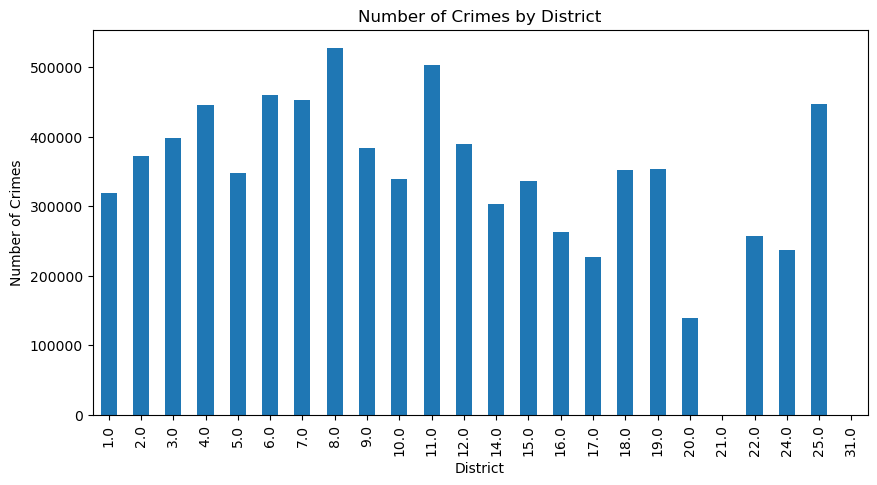

In [41]:
# plot Number of Crimes by District
fig, ax = plt.subplots(figsize=(10, 5))
df.groupby('District')['ID'].size().plot(kind='bar')
plt.title('Number of Crimes by District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

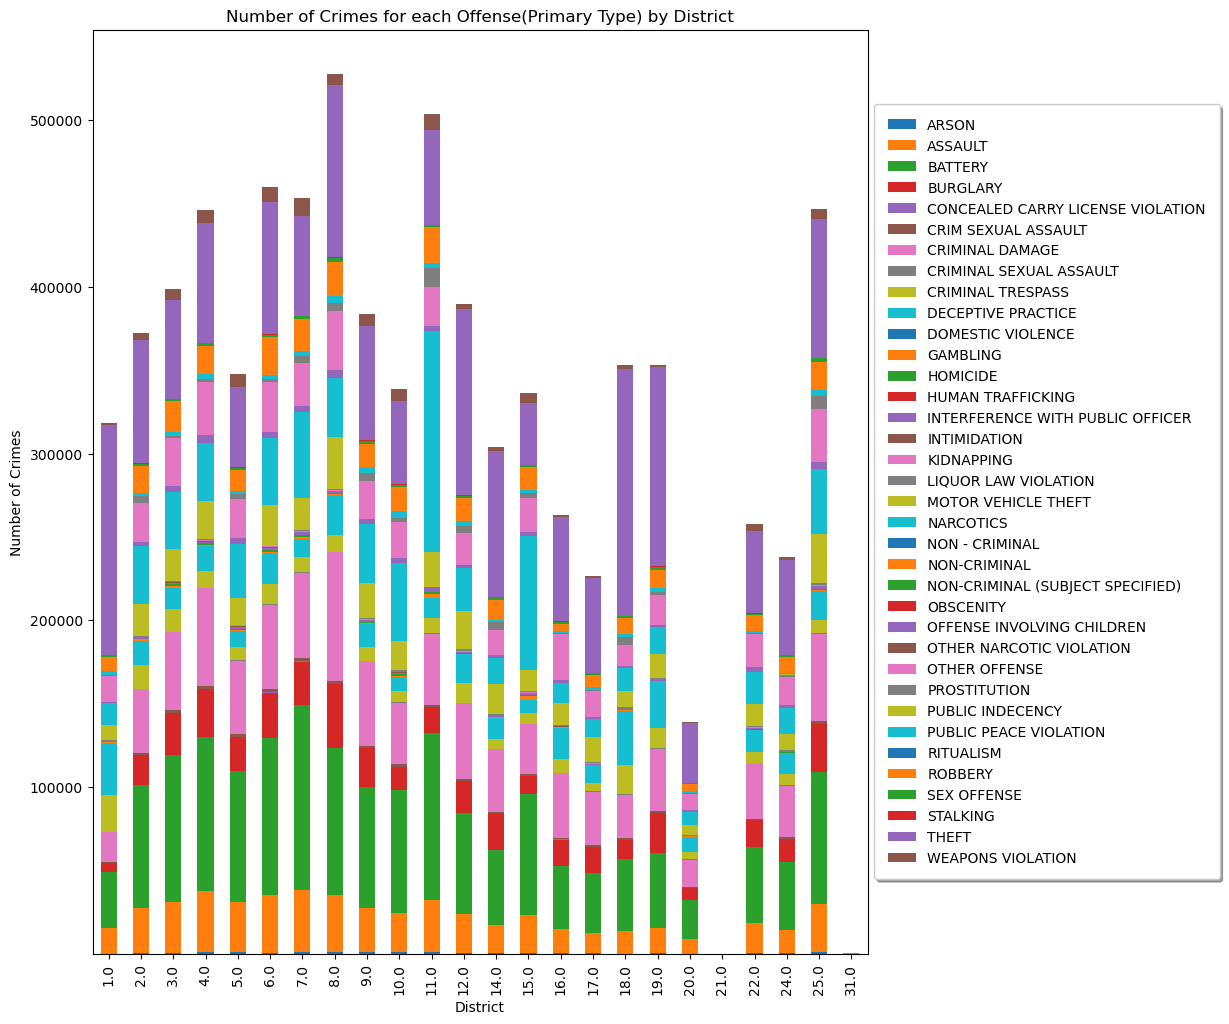

In [42]:
# plot Number of Crimes for each Primary Type by District
df.groupby(['District','Primary Type'])['ID'].size().unstack().plot(kind='bar', figsize=(10,12), stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, borderpad=1)
plt.title('Number of Crimes for each Offense(Primary Type) by District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')

In [43]:
# creating a new dataframe to store year, Primary Type, and number of crimes
crimedf = pd.DataFrame(df.groupby(['Year','Primary Type']).size().sort_values(ascending=False).rename('COUNT').reset_index())


In [44]:
# display the dataframe
crimedf.head()

Year Primary Type  COUNT
0  2001        THEFT  99277
1  2003        THEFT  98876
2  2002        THEFT  98332
3  2004        THEFT  95463
4  2002      BATTERY  94153

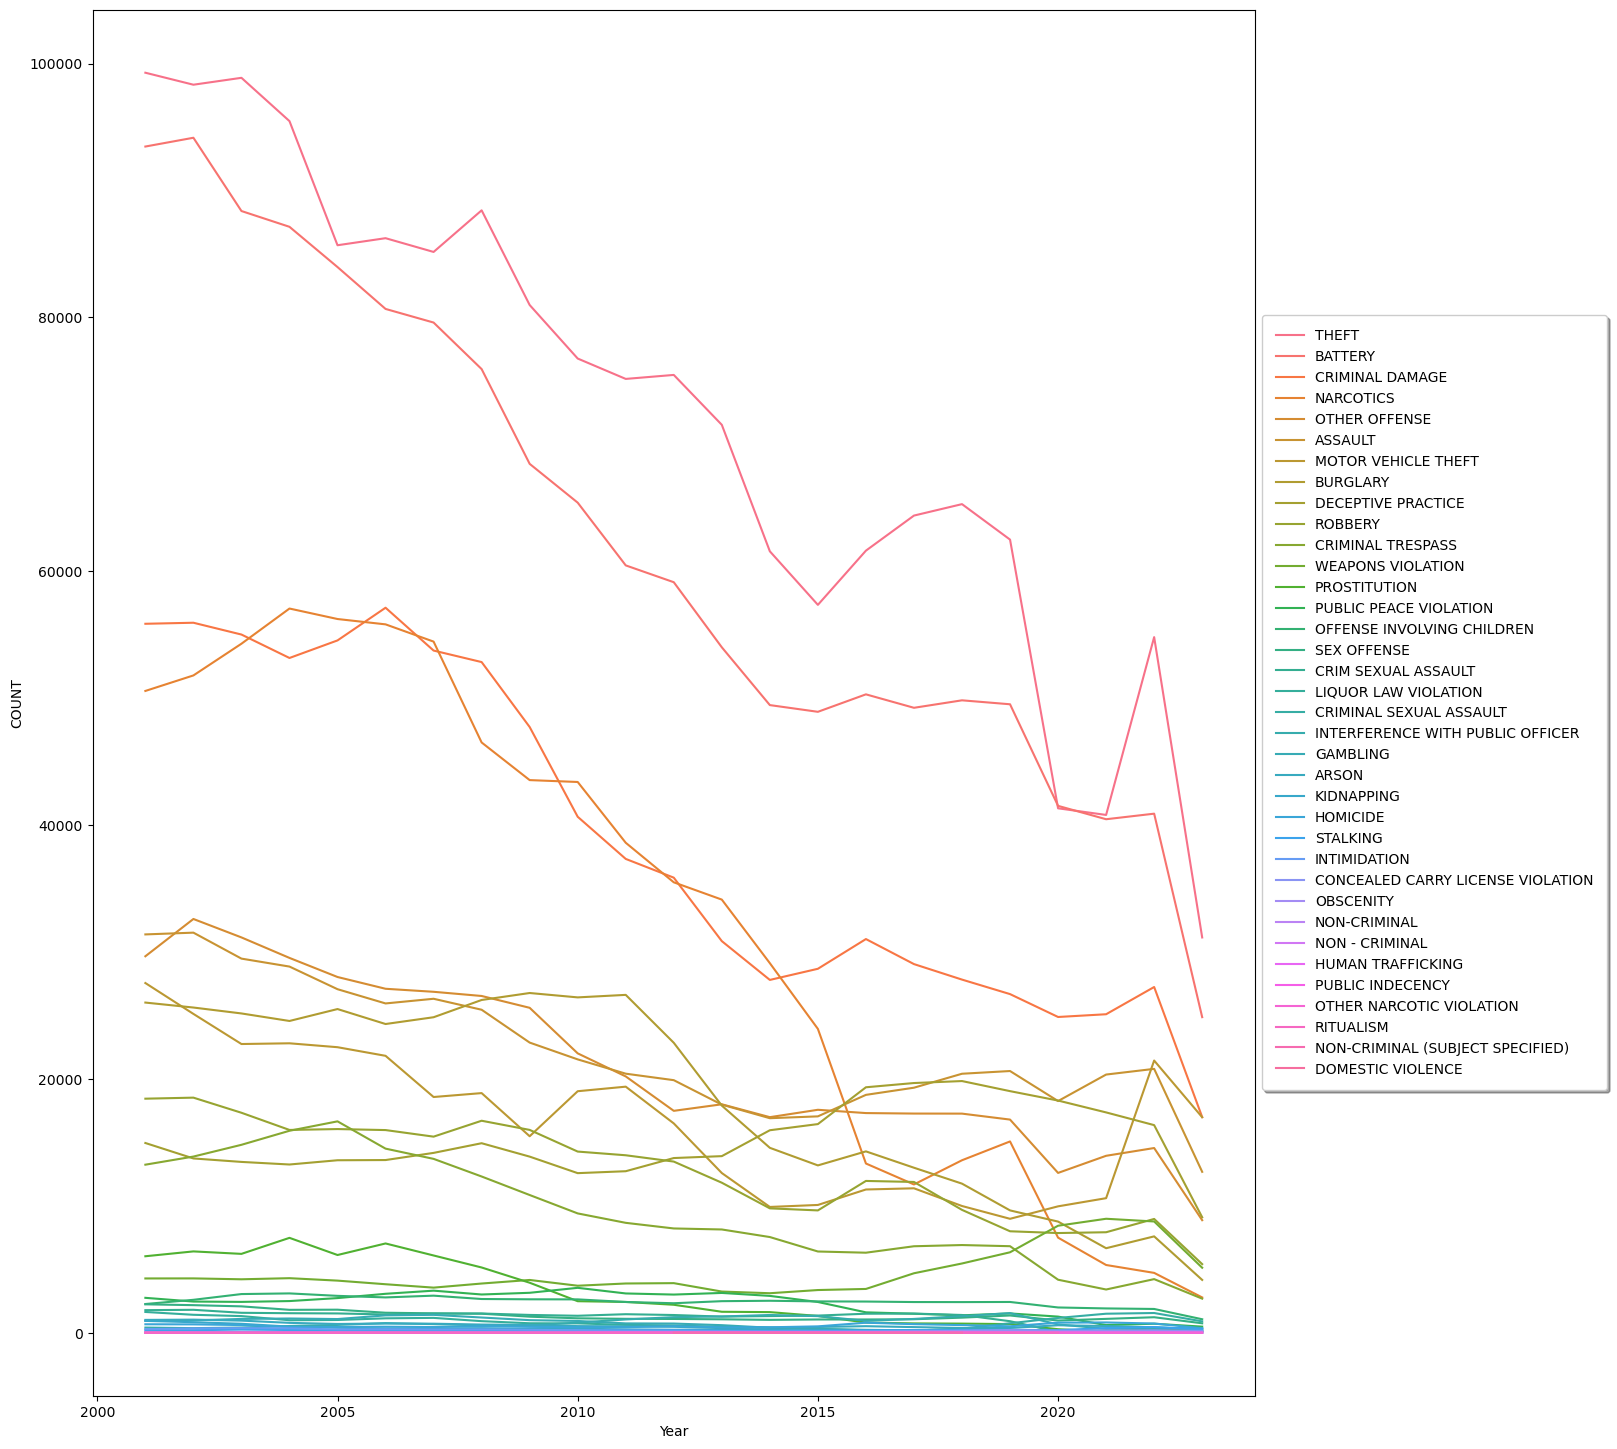

In [45]:
# plotting the crime trend over YEARs
plt.figure(figsize=(15, 18))
ax = sns.lineplot(x='Year',
                  y='COUNT',
                  hue='Primary Type',
                  data=crimedf).legend(loc='center left',
                                           bbox_to_anchor=(1, 0.5),
                                           fancybox=True,
                                           shadow=True,
                                           borderpad=1)

In [46]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Dates', 'Time', 'DAYOFWEEK', 'MONTH'],
      dtype='object')

In [47]:
### create a new dataframe to store Latitude, Longitude and COUNT

crime_loc_df = pd.DataFrame(df.groupby(['Latitude', 'Longitude']).size().sort_values(ascending=False).rename('COUNT').reset_index())


In [48]:
crime_loc_df.head()


Latitude  Longitude  COUNT
0  41.976290 -87.905227  14332
1  41.754593 -87.741529  10335
2  41.883500 -87.627877   8505
3  41.897895 -87.624097   4878
4  41.909664 -87.742729   3507

In [49]:
crime_loc_df['COUNT'].sum()


7770175

In [50]:
# Drop a row by condition
crime_loc_filter_df = crime_loc_df[crime_loc_df.Latitude != -1]

In [51]:
# Get the locations which have number of crimes >= 100
crime_max_loc_df = crime_loc_filter_df[crime_loc_filter_df.COUNT >= 100]

In [52]:
# import relevant libraries
import plotly.graph_objs as go
import plotly as py
# must enable in order to use plotly off-line
py.offline.init_notebook_mode()

In [53]:
# scatter plot to plot Latitude and Longitude according to the crime count
scatter = go.Scatter(x=crime_max_loc_df['Longitude'],
                     y=crime_max_loc_df['Latitude'],
                     marker={'color': crime_max_loc_df['COUNT'],
                             'showscale': True},
                     text=crime_max_loc_df['COUNT'],
                     mode='markers')
fig = go.FigureWidget(data=[scatter],
                      layout={'xaxis': {'title': 'longitude'},
                              'yaxis': {'title': 'latitude'}})
fig = fig.update_layout(
            autosize=False,
            width=1000,
            height=1000
      )
 #fig.show()

In [54]:
# Plot and embed in the notebook
py.offline.iplot(fig, filename='scatterplot_locations')
fig.show()

In [55]:
### RENAMING THE COLUMN PRIMARY TYPE TO PRIMATY_TYPE COLUMN TO NOT GET SYNTAX ERROR IN THE NEXT CELL
df.rename(columns={'Primary Type':'Primary_type'}, inplace=True)


<AxesSubplot:>

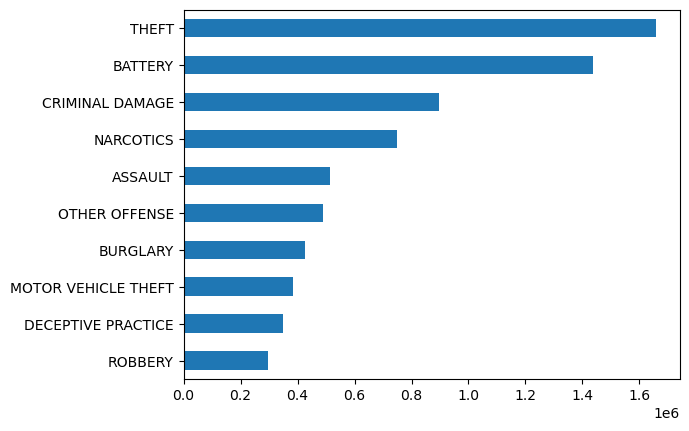

In [56]:
# visualize Primary_type vs number of incidents
df.Primary_type.value_counts().iloc[:10].sort_values().plot(kind="barh")

In [80]:
crime_count_by_type = pd.DataFrame(crimedf.groupby('Primary_type').size().sort_values(ascending=False).rename('COUNT').reset_index())


In [81]:
# display the dataframe
crime_count_by_type.head(10)

Primary_type    COUNT
0                THEFT  1658116
1              BATTERY  1435731
2      CRIMINAL DAMAGE   895904
3            NARCOTICS   748930
4              ASSAULT   513778
5        OTHER OFFENSE   487894
6             BURGLARY   426407
7  MOTOR VEHICLE THEFT   383562
8   DECEPTIVE PRACTICE   349927
9              ROBBERY   295081

[Text(0, 0, 'THEFT'),
 Text(1, 0, 'BATTERY'),
 Text(2, 0, 'CRIMINAL DAMAGE'),
 Text(3, 0, 'NARCOTICS'),
 Text(4, 0, 'ASSAULT'),
 Text(5, 0, 'OTHER OFFENSE'),
 Text(6, 0, 'BURGLARY'),
 Text(7, 0, 'MOTOR VEHICLE THEFT'),
 Text(8, 0, 'DECEPTIVE PRACTICE'),
 Text(9, 0, 'ROBBERY'),
 Text(10, 0, 'CRIMINAL TRESPASS'),
 Text(11, 0, 'WEAPONS VIOLATION'),
 Text(12, 0, 'PROSTITUTION'),
 Text(13, 0, 'OFFENSE INVOLVING CHILDREN'),
 Text(14, 0, 'PUBLIC PEACE VIOLATION'),
 Text(15, 0, 'SEX OFFENSE'),
 Text(16, 0, 'CRIM SEXUAL ASSAULT'),
 Text(17, 0, 'INTERFERENCE WITH PUBLIC OFFICER'),
 Text(18, 0, 'LIQUOR LAW VIOLATION'),
 Text(19, 0, 'GAMBLING'),
 Text(20, 0, 'ARSON'),
 Text(21, 0, 'HOMICIDE'),
 Text(22, 0, 'KIDNAPPING'),
 Text(23, 0, 'CRIMINAL SEXUAL ASSAULT'),
 Text(24, 0, 'STALKING'),
 Text(25, 0, 'INTIMIDATION'),
 Text(26, 0, 'CONCEALED CARRY LICENSE VIOLATION'),
 Text(27, 0, 'OBSCENITY'),
 Text(28, 0, 'PUBLIC INDECENCY'),
 Text(29, 0, 'NON-CRIMINAL'),
 Text(30, 0, 'OTHER NARCOTIC VIOLATION'),


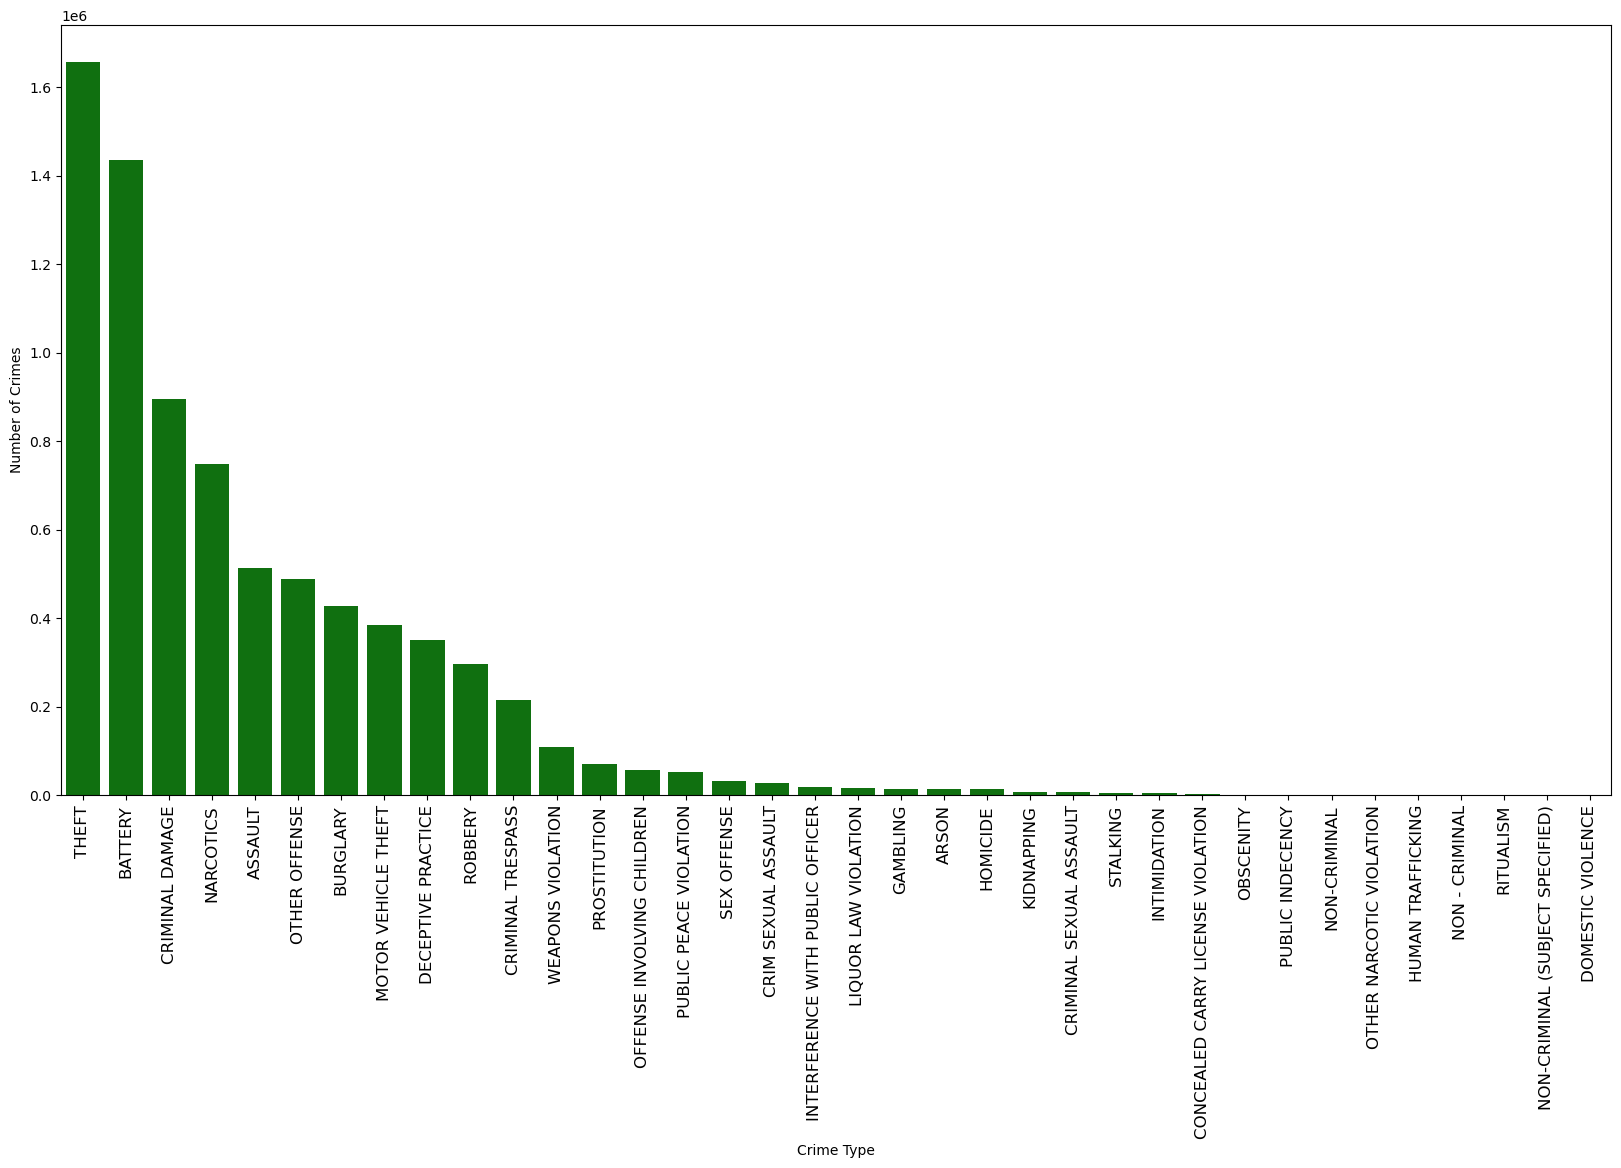

In [82]:
# create the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 10))

# plot the graph of number of crimes vs. OFFENSE_CODE_GROUP
# all types of OFFENSE_CODE_GROUP types will be plotted
barplot_alltypes = sns.barplot(x="Primary_type", y="COUNT", data=crime_count_by_type, color="g")
# set the axis labels
ax.set(ylabel="Number of Crimes", xlabel="Crime Type")
# rotate xticklabels
barplot_alltypes.set_xticklabels(barplot_alltypes.get_xticklabels(),
                        rotation=90,
                        fontweight='light',
                        fontsize='large'
                        )

In [68]:
crimedf = df

In [97]:
# split Date into date and time
df['DATE'] = [d.date() for d in crimedf['Date']]
df['TIME'] = [d.time() for d in crimedf['Date']]
df['YEAR'] = crimedf.Date.dt.year

In [70]:
# Extract the Year-Month combination from the 'OCCURRED_ON_DATE' using 'dt.to_period' function.
# Where 'D', 'M' and 'Y' are the inputs.
# Here, 'OCCURRED_ON_DATE' should be in the datetime format.
crimedf['YEAR_MONTH'] = pd.to_datetime(df['Date']).dt.to_period('M')

In [71]:
# display first five fields
crimedf.head()

ID Case Number                Date                  Block  IUCR  \
0  11646166    JC213529 2018-09-01 00:01:00  082XX S INGLESIDE AVE  0810   
1  11645836    JC212333 2016-05-01 00:25:00    055XX S ROCKWELL ST  1153   
2  11243268    JB167760 2017-01-01 00:01:00       047XX N CLARK ST  1562   
3   1896258     G749215 2001-12-15 02:00:00       011XX N STATE ST  0460   
4  11645527    JC212744 2015-02-02 10:00:00     069XX W ARCHER AVE  1153   

         Primary_type                          Description  \
0               THEFT                            OVER $500   
1  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
2         SEX OFFENSE            AGG CRIMINAL SEXUAL ABUSE   
3             BATTERY                               SIMPLE   
4  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   

  Location Description  Arrest  Domestic  ...  Latitude  Longitude  Location  \
0            RESIDENCE   False      True  ...       NaN        NaN       NaN   
1                  NaN   False     False  ...       NaN        NaN       NaN   
2            APARTMENT   False     False  ...       NaN        NaN       NaN   
3               STREET   False     False  ...       NaN        NaN       NaN   
4                OTHER   False     False  ...       NaN        NaN       NaN   

                Dates      Time  DAYOFWEEK      MONTH        DATE      TIME  \
0 2018-09-01 00:01:00  00:01:00   Saturday  September  2018-09-01  00:01:00   
1 2016-05-01 00:25:00  00:25:00     Sunday        May  2016-05-01  00:25:00   
2 2017-01-01 00:01:00  00:01:00     Sunday    January  2017-01-01  00:01:00   
3 2001-12-15 02:00:00  02:00:00   Saturday   December  2001-12-15  02:00:00   
4 2015-02-02 10:00:00  10:00:00     Monday   February  2015-02-02  10:00:00   

   YEAR_MONTH  
0     2018-09  
1     2016-05  
2     2017-01  
3     2001-12  
4     2015-02  

[5 rows x 29 columns]

In [73]:
# assign the cleaned dataframe to crimedf
new_crimedf = crimedf

In [74]:
# get the number of crimes for each day
crime_count_by_date = pd.DataFrame(df.groupby('Date').size().sort_values(ascending=False).rename('COUNT').reset_index())


In [75]:
# display the dataframe
crime_count_by_date.head()

Date  COUNT
0 2008-01-01 00:01:00    304
1 2007-01-01 00:01:00    259
2 2006-01-01 00:01:00    226
3 2004-01-01 00:00:00    218
4 2005-01-01 00:01:00    215

In [98]:
# get the number of crimes for each year
crime_count_by_year = pd.DataFrame(crimedf.groupby('YEAR').size().rename('COUNT').reset_index())

[Text(0, 0, '2001'),
 Text(1, 0, '2002'),
 Text(2, 0, '2003'),
 Text(3, 0, '2004'),
 Text(4, 0, '2005'),
 Text(5, 0, '2006'),
 Text(6, 0, '2007'),
 Text(7, 0, '2008'),
 Text(8, 0, '2009'),
 Text(9, 0, '2010'),
 Text(10, 0, '2011'),
 Text(11, 0, '2012'),
 Text(12, 0, '2013'),
 Text(13, 0, '2014'),
 Text(14, 0, '2015'),
 Text(15, 0, '2016'),
 Text(16, 0, '2017'),
 Text(17, 0, '2018'),
 Text(18, 0, '2019'),
 Text(19, 0, '2020'),
 Text(20, 0, '2021'),
 Text(21, 0, '2022'),
 Text(22, 0, '2023')]

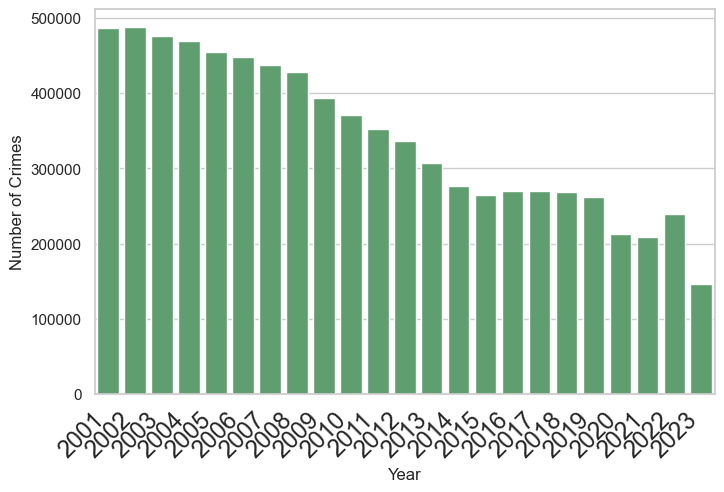

In [99]:
# create the matplotlib figure
fig, ax = plt.subplots(figsize=(8, 5))

# plot the graph of number of crimes vs. year
barplot3 = sns.barplot(x="YEAR", y="COUNT", data=crime_count_by_year, color="g")
# set the axis labels
ax.set(ylabel="Number of Crimes", xlabel="Year")
# rotate xticklabels
barplot3.set_xticklabels(barplot3.get_xticklabels(),
                        rotation=45,
                        horizontalalignment='right',
                        fontweight='light',
                        fontsize='x-large'
                        )

In [88]:
# get the number of crimes for each day without sorting
new_crime_count_by_date = pd.DataFrame(df.groupby('DATE').size().rename('COUNT').reset_index())

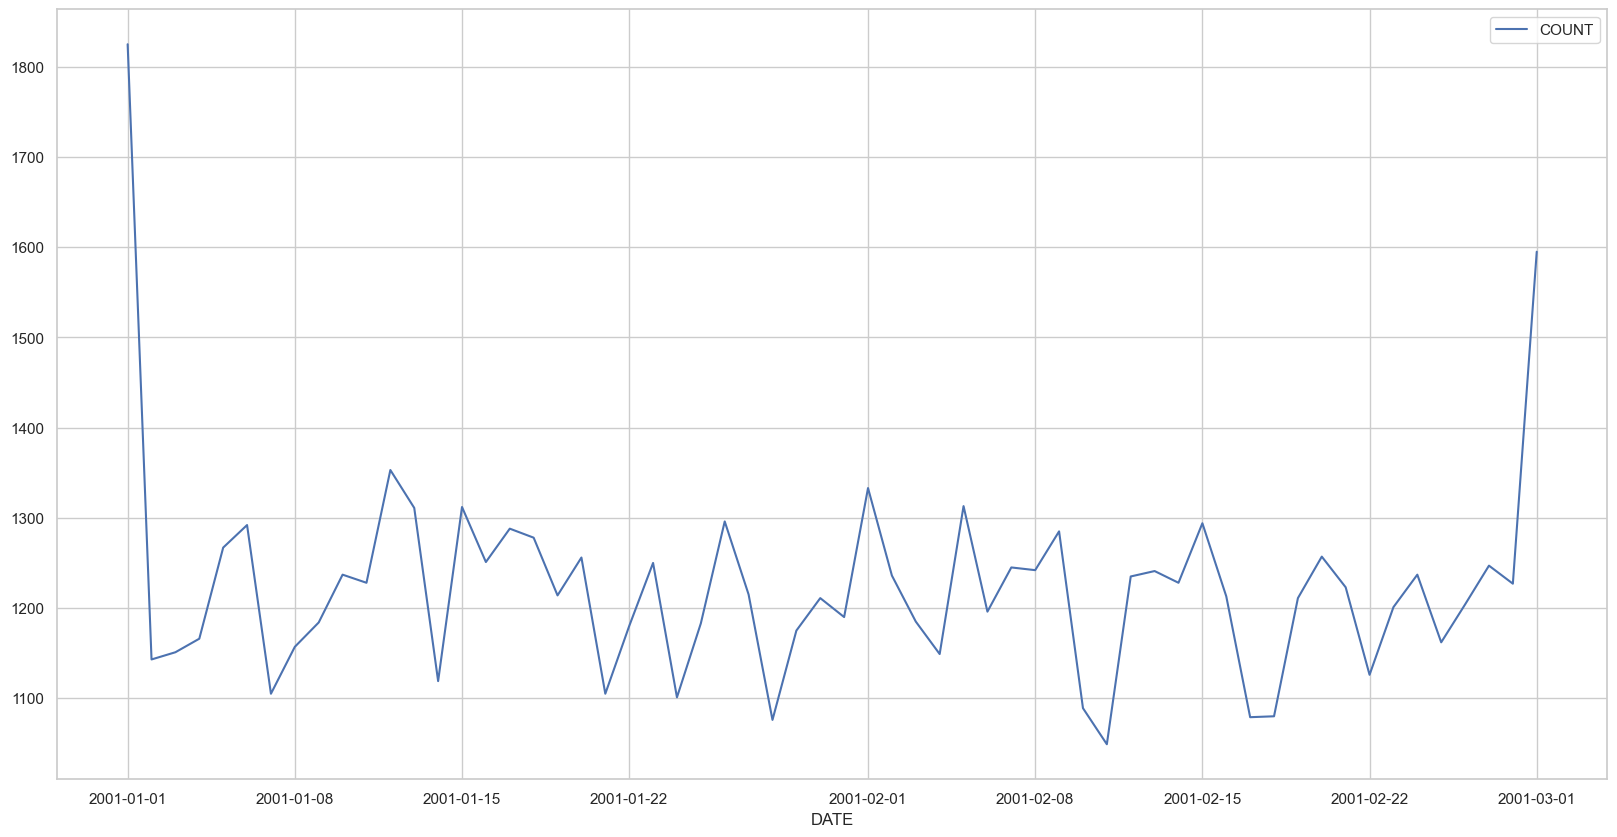

In [89]:
# plot the line graph in order to observe the pattern
# Number of crimes for first 60 days will be plotted
lineplot1 = new_crime_count_by_date.iloc[:60, :].plot.line(x="DATE", y="COUNT", figsize=(20, 10))

In [103]:
# get the number of crimes for each year
crime_count_by_month = pd.DataFrame(crimedf.groupby('MONTH').size().rename('COUNT').reset_index())